# 1. Matrice de design

## 1.1. Construction de la matrice

In [ ]:
import feature_extraction

X_train_fft = h5py.File('X_train_fft.h5','r')
X_test_fft = h5py.File('X_test_fft.h5','r')

X_train_preprocessed = feature_extraction.extractMultiFeatureAll(X_train_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="trainX")
X_test_preprocessed = feature_extraction.extractMultiFeatureAll(X_test_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="testX")

## 1.2. Chargement de la matrice

In [1]:
import pickle

temp_var_file = open("trainX" + '.txt','rb')
X_train_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

temp_var_file = open("testX" + '.txt','rb')
X_test_preprocessed = pickle.load(temp_var_file)
temp_var_file.close()

# 2. Apprentissage

In [2]:
import cross_validation_learning

## 2.1. K-NN

[[1]
 [3]] [[2. 2. 2. ... 2. 4. 2.]
 [2. 2. 2. ... 2. 4. 2.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


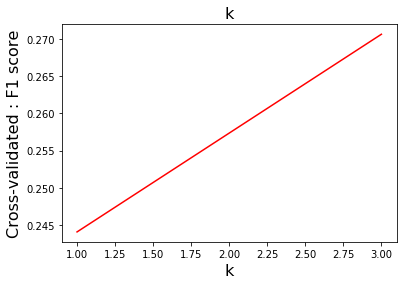

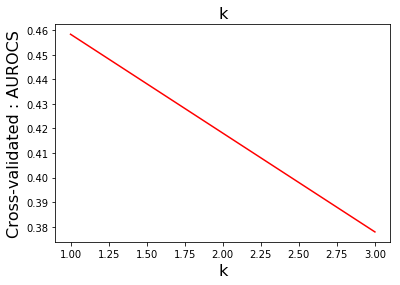

In [3]:
from sklearn import neighbors

""" KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs) """
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, neighbors.KNeighborsClassifier, [[i for i in range(1,5,2)]], 10)

cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "k", [])

## 2.2. Régression logistique

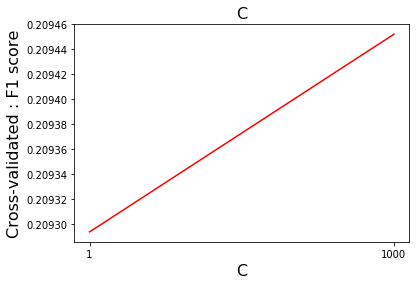

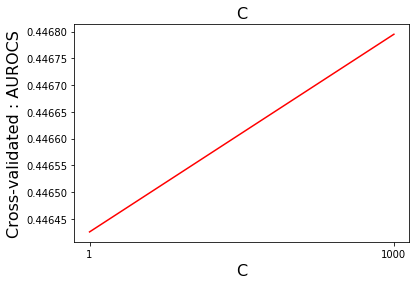

In [4]:
from sklearn import linear_model

""" LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None) """
#mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [[]], 10)
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, linear_model.LogisticRegression, [['l2'], [False], [0.0001,0.0002,0.0003], [1,1000]], 10)

#cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])
cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 3, "C", [0, 0, 0])

## 2.3. Arbre de décision

In [6]:
from sklearn import tree

""" DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False) """
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, tree.DecisionTreeClassifier, [[]], 10)

cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

F1-score : 0.21164207944321528
AUROC : 0.4266679457213379


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1324	289	474	143	410
Predicted 1	15	0	7	1	3
Predicted 2	2237	1057	16620	5582	10021
Predicted 3	1	1	0	0	0
Predicted 4	42	6	31	5	20


## 2.4. K-Means

In [7]:
from sklearn import cluster

""" KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’) """
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, cluster.KMeans, [[4]], 10)

cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

F1-score : 0.06650320938275386
AUROC : 0.5878983899118926


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1515	664	11373	3792	6860
Predicted 1	856	243	3325	1101	2058
Predicted 2	490	142	330	109	235
Predicted 3	758	304	2104	729	1301
Predicted 4	0	0	0	0	0


## 2.5. SVM

In [3]:
from sklearn import svm

""" LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000) """
mat_theta, mat_ypred, mat_yprob, clf = cross_validation_learning.learn(X_train_preprocessed, svm.LinearSVC, [[]], 10)

cross_validation_learning.visualizeResults(mat_theta, mat_ypred, mat_yprob, 0, "", [])

F1-score : 0.21049634359872282
AUROC : 0.44272189277359725


Matrice de confusion : 

		True 0  True 1  True 2  True 3  True 4
Predicted 0	1232	228	359	97	305
Predicted 1	0	0	0	0	0
Predicted 2	2387	1125	16773	5634	10149
Predicted 3	0	0	0	0	0
Predicted 4	0	0	0	0	0


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 3. Prédiction

In [ ]:
cross_validation_learning.predict(X_test_preprocessed, clf, save=True, name_save = "First")